In [104]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from sklearn import preprocessing
%matplotlib inline
import math

In [141]:
train_df = pd.read_csv('Titanic_train.csv') # 891 rows x 12 columns
test_df = pd.read_csv('Titanic_test.csv')   # 419 rows x 11 columns (doesn't include 'Survived' feature)

In [142]:
def prep_data(df):
    # drop the following features
    df = df.drop('PassengerId', axis=1)
    df = df.drop('Name', axis=1)
    df = df.drop('Ticket', axis=1)
    df = df.drop('Embarked', axis=1)
    df = df.drop('Fare', axis=1)
    df = df.drop('Age', axis=1) # Lots of NaNs
    
    # create the cabin-level feature to factors : A, B, C, D, E, F, G, T, and change NaN to Z
    df['Cabin'] = df['Cabin'].fillna('Z')
    df['Cabin'] = df['Cabin'].astype(str).str[0]
    
    # change the cabin-level factors to binary indicator variables
    df['A'] = pd.Series(df['Cabin'].values, index=df.index)
    df['A'] = df['A'].map({'A':1, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'T':0, 'Z':0})
    df['B'] = pd.Series(df['Cabin'].values, index=df.index)
    df['B'] = df['B'].map({'A':0, 'B':1, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'T':0, 'Z':0})
    df['C'] = pd.Series(df['Cabin'].values, index=df.index)
    df['C'] = df['C'].map({'A':0, 'B':0, 'C':1, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'T':0, 'Z':0})
    df['D'] = pd.Series(df['Cabin'].values, index=df.index)
    df['D'] = df['D'].map({'A':0, 'B':0, 'C':0, 'D':1, 'E':0, 'F':0, 'G':0, 'H':0, 'T':0, 'Z':0})
    df['E'] = pd.Series(df['Cabin'].values, index=df.index)
    df['E'] = df['E'].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':1, 'F':0, 'G':0, 'H':0, 'T':0, 'Z':0})
    df['F'] = pd.Series(df['Cabin'].values, index=df.index)
    df['F'] = df['F'].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':1, 'G':0, 'H':0, 'T':0, 'Z':0})
    df['G'] = pd.Series(df['Cabin'].values, index=df.index)
    df['G'] = df['G'].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':1, 'H':0, 'T':0, 'Z':0})
    df['H'] = pd.Series(df['Cabin'].values, index=df.index)
    df['H'] = df['H'].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':1, 'T':0, 'Z':0})
    df['T'] = pd.Series(df['Cabin'].values, index=df.index)
    df['T'] = df['T'].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'T':1, 'Z':0})
    df['Z'] = pd.Series(df['Cabin'].values, index=df.index)
    df['Z'] = df['Z'].map({'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'T':0, 'Z':1})
    df = df.drop('Cabin', axis=1)
    
    # change 'Sex' feature to Male and Female binary indicator variables
    df['Male'] = pd.Series(df['Sex'].values, index=df.index)
    df['Male'] = df['Male'].map({'male': 1, 'female': 0})

    df['Female'] = pd.Series(df['Sex'].values, index=df.index)
    df['Female'] = df['Female'].map({'male': 0, 'female': 1})
    
    df = df.drop('Sex', axis=1)

    # shuffle the rows        disabled this for now because you need the indices of test_df when submitting to Kaggle
    #df = df.sample(frac=1)
    
    # normalize the inputs
    #df = (df - df.mean(axis=0))/df.std(axis=0)  didn't work
    
    return df

train_df = prep_data(train_df)
test_df = prep_data(test_df)
train_df

,Survived,Pclass,SibSp,Parch,A,B,C,D,E,F,G,H,T,Z,Male,Female
0,0,3,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,3,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,0,3,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7,0,3,3,1,0,0,0,0,0,0,0,0,0,1,1,0
8,1,3,0,2,0,0,0,0,0,0,0,0,0,1,0,1
9,1,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1


In [143]:
# Get the output feature and save as its own column

Y_train = train_df['Survived']
X_train = train_df.drop('Survived', axis=1)

# Convert pandas to numpy

X_train = X_train.iloc[:] # all rows
X_test = test_df.iloc[:]

Y_train = Y_train.iloc[:]
#Y_test = *** not available in datasets given***

# let each column represent one data entry

X_train = X_train.values.T
X_test = X_test.values.T
Y_train = Y_train.values.T
Y_train.shape = (1,891)

print ("number of training examples = " + str(X_train.shape[1])) 
print ("number of test examples = " + str(X_test.shape[1])) 
print ("X_train shape: " + str(X_train.shape)) 
print ("Y_train shape: " + str(Y_train.shape)) 
print ("X_test shape: " + str(X_test.shape)) 

number of training examples = 891
number of test examples = 418
X_train shape: (15, 891)
Y_train shape: (1, 891)
X_test shape: (15, 418)


In [144]:
# helper functions in model

def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, [n_x, None])
    Y = tf.placeholder(tf.float32, [n_y, None])
    return X,Y

def initialize_parameters():
    # input layer      : 15 nodes
    # 1st hidden layer : 5 nodes
    # 2nd hidden layer : 3 nodes
    # output layer     : 1 node
    
    W1 = tf.get_variable('W1', [5,15], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable('b1', [5,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable('W2', [3,5], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable('b2', [3,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable('W3', [1,3], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable('b3', [1,1], initializer = tf.zeros_initializer())
    
    parameters = {'W1': W1,
                 'b1': b1,
                 'W2': W2,
                 'b2': b2,
                 'W3': W3,
                 'b3': b3}
    return parameters

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2), b3)
    
    return Z3

def compute_cost(Z3, Y, parameters):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels))
    
    #L2_regularization_cost = np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3))
    
    beta = 0.01
    regularizers = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3)
    cost = tf.reduce_mean(cost + beta*regularizers)
    
    #cost = cost + L2_regularization_cost
    return cost

def random_mini_batches(X, Y, mini_batch_size = 20):
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    # shuffle X and Y
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # last batch
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [145]:
def model(X_train, Y_train, X_test, learning_rate = 0.001,
         num_epochs = 1000, minibatch_size = 10, print_cost = True):
    
    ops.reset_default_graph()
    (n_x,m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    X, Y = create_placeholders(n_x,n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3,Y, parameters)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m/minibatch_size)
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches
            if print_cost == True and epoch % 100 == 0:
                print('Epoch %i cost: %f' % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0 and epoch >= 0:
                costs.append(epoch_cost)
                costs.append(epoch_cost)
                costs.append(epoch_cost)
                costs.append(epoch_cost)
                costs.append(epoch_cost)
        
        plt.plot(np.squeeze(costs),lw=0.5)
        plt.ylabel('cost')
        plt.xlabel('epoch')
        plt.title('Learning rate='+str(learning_rate))
        
        parameters = sess.run(parameters)
        print('parameters trained')
        
        
        correct_prediction = tf.equal(tf.round(tf.sigmoid(Z3)), tf.round(Y))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
        
        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        #print("Test Accuracy:",  accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Epoch 0 cost: 0.739181
Epoch 100 cost: 0.621171
Epoch 200 cost: 0.586635
Epoch 300 cost: 0.556266
Epoch 400 cost: 0.535646
Epoch 500 cost: 0.521146
parameters trained
Train Accuracy: 0.800224


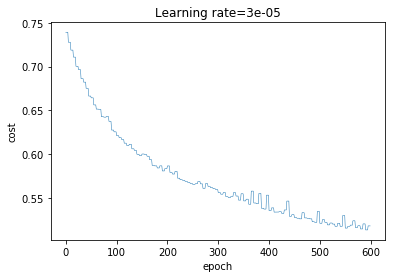

In [147]:
parameters = model(X_train, Y_train, X_test, learning_rate = 0.00003, num_epochs=600)

In [149]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# use trained parameters to make predictions given X_test from Kaggle

def predict(parameters, X_test):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = np.add(np.dot(W1, X_test), b1)
    A1 = np.maximum(Z1, 0)
    Z2 = np.add(np.dot(W2, A1), b2)
    A2 = np.maximum(Z2, 0)
    Z3 = np.add(np.dot(W3, A2), b3)
    
    predict = sigmoid(Z3)
    
    for i in range(predict.size):
        if predict[:,i] < 0.5:
            predict[:,i] = 0
        else:
            predict[:,i] = 1           
    return predict
    
Y_test_predict = predict(parameters, X_test)
Y_test_predict

array([[ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.

In [ ]:
# Y_test_predict had 77% accuracy when submitted to Kaggle
https://www.kaggle.com/c/titanic/leaderboard